<a href="https://colab.research.google.com/github/jon1996/Elimu/blob/main/cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

in this project we will follow up the four steps in the deep learning classification pipeline.


1.   gathering your dataset
2.   splitting your data into training, testing, and validation steps
3.   training your network
4.   and finally evaluating your model



# ***import and file and folder setting up***

In [ ]:
import os, shutil

In [ ]:
original = os.path.join('/content/drive/My Drive/datas')
base_dir = os.path.join('/content/drive/My Drive/dataset')
os.mkdir(base_dir)


In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# ***Copy files for testing and training validation***

Take the the cats file for training, testing and validation

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(100)]
for fname in fnames:
  src = os.path.join(original, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:

  src = os.path.join(original, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(150, 200)]
for fname in fnames:
  src = os.path.join(original, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

Take the the dogs file for training, testing and validation 

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(100)]
for fname in fnames:

  src = os.path.join(original, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
  src = os.path.join(original, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(150, 200)]
for fname in fnames:
  src = os.path.join(original, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 100


In [ ]:
 print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 100


In [ ]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 50


In [ ]:
 print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 50


In [ ]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 50


In [ ]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 50


As we can see above, we have 3 folders(test, train, validation), each of them containig 2 subfolder for cats and dogs images, we have trained 100 cats images, 100 dogs images, we validated 50 images for both and we tesed 50 images for both, in total we train 200 images, validated 100 images and we tested 100 images.

# ***represention of a small convnet(CNN) for dogs - cats classification***

In [ ]:
from keras import layers
from keras import models

seting up the model for the binary classification

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

# ***Configuring the model for training***

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

# ***Using keras to read images from directories and image generator or CNN transfer learning***

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#Rescal all image by 1/255 because our images has higher pixels
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
train_dir, #target for our trainig images
target_size=(150, 150), #Resizing our image to 150 X 150
batch_size = 20, 
class_mode='binary') #binary labels.

Found 200 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
validation_dir, #target for our validation images
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 100 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# *** Fitting the model using a batch generator***

In [ ]:
import tensorflow as tf

In [ ]:
history = model.fit_generator(
train_generator,
steps_per_epoch=10,
epochs=3,
validation_data=validation_generator,
validation_steps=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/3
10/10 [==============================] - 12s 1s/step - loss: 0.0040 - acc: 1.0000 - val_loss: 1.9488 - val_acc: 0.6100
Epoch 2/3
10/10 [==============================] - 12s 1s/step - loss: 0.0033 - acc: 1.0000 - val_loss: 2.0431 - val_acc: 0.6000
Epoch 3/3
10/10 [==============================] - 14s 1s/step - loss: 0.0032 - acc: 1.0000 - val_loss: 2.6254 - val_acc: 0.5900


In [ ]:
#let save our modal
model.save('cats_and_dogs.h5')

# *** Displaying curve of loss and accuracy during training***

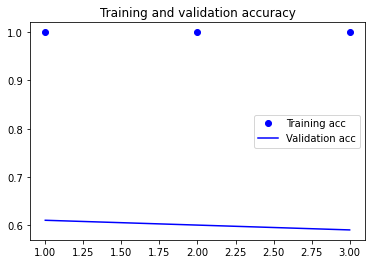

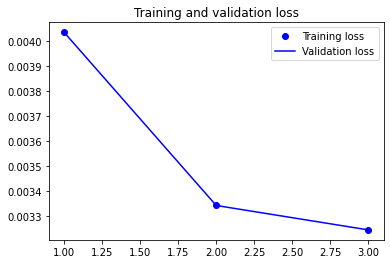

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

our graph looks small because of our dataset, and we proceed just on 3 epoches

# ***  data augmentation configuration via ImageDataGenerator***

In [ ]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# ***   Displaying some randomly augmented training images***




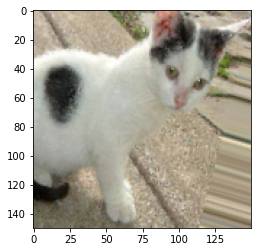

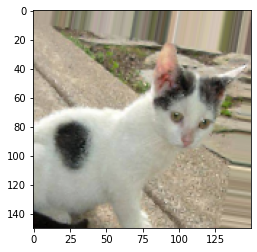

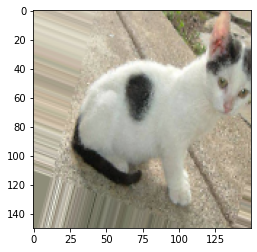

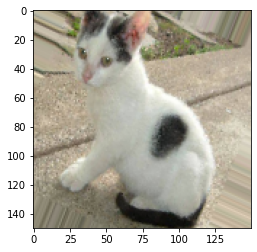

In [ ]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
  fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()


As said in the book deep learning version 2. By using regularization techniques even further, and by tuning the network’s parameters (such as the number of filters per convolution layer, or the number of layers in
the network), you may be able to get an even better accuracy, likely up to 86% or 87%.
But it would prove difficult to go any higher just by training your own convnet(CNN) from
scratch, because you have so little data to work with

In [ ]:
from keras.models import load_model
model = load_model('cats_and_dogs.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0